# Determine conversion factor between DFT and Faravelli et al. values
This is a notebook for analyzing the density functional theory experiments we performed in order to assign values to the kinetic parameters of reactions we added to the Faravelli et al. scheme.

In this section of the notebook we look at the results of carrying out DFT calculations on molecules designed to replicate reactions that exist in Faravelli et al.'s scheme.  We are doing this to see how close the DFT-based values are to the activation energies in their scheme.

Based on this comparison we estimate a conversion factor between our DFT-derived activation energies and comparable values to fit with their scheme.

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline  


logfiles = !ls data/DFT/initiation_reactions/*.log

# A dictionary of the enthalpies for each molecule
enthal = {}
for filename in logfiles:
    with open(filename, 'r') as log:
        for line in log:
            if all(word in line for word in ['Sum', 'Enthal']):
                enthal[filename.split('/')[3].split('.')[0]] = (627.5095 *
                                                    float(line.split()[6]))

# This is the enthalpy in kcal/mol (measure of the internal energy of system)
enthal

{'4PLIGM2': -840591.4858810776,
 '4PRADIOM2': -504413.693561363,
 '4RPHENOXM2': -336107.820617898,
 '5LIG': -553252.906038605,
 '5RADIO': -360748.3070629715,
 '5RPHENOX': -192437.77799901649,
 '7PADIOM2': -504824.21341381053,
 '7PRADIOM2': -504413.693561363,
 '8PADIO': -361162.4332125155,
 '8PRADIO': -360748.3070629715,
 '9PKETM2': -504086.96756248845,
 '9PRKETM2': -503682.1925595135,
 'Hatom': -311.102894853}

In [22]:
# calculate deltaH for each of the reactions [J/mol]
deltaH_4 = int(round(4184 * (enthal['4PRADIOM2'] +
                             enthal['4RPHENOXM2'] - enthal['4PLIGM2'])))
deltaH_5 = int(round(4184 * (enthal['5RPHENOX'] +
                             enthal['5RADIO'] - enthal['5LIG'])))
deltaH_7 = int(round(4184 * (enthal['7PRADIOM2'] +
                             enthal['Hatom'] - enthal['7PADIOM2'])))
deltaH_8 = int(round(4184 * (enthal['8PRADIO'] +
                             enthal['Hatom'] - enthal['8PADIO'])))
deltaH_9 = int(round(4184 * (enthal['9PRKETM2'] +
                             enthal['Hatom'] - enthal['9PKETM2'])))

# estimating Ea [J/mol] from deltaH using Blowers Masel correlation
E0 = 9 * 4184
e_a = []

for deltaH in [deltaH_4, deltaH_5, deltaH_7, deltaH_8, deltaH_9]:
    try:
        if deltaH < -4 * E0:
            e_a.append(0)
        elif deltaH > 4 * E0:
            e_a.append(int(round(deltaH)))
        else:
            e_a.append(int(round(E0 * ((1 + (deltaH / (4 * E0)))**2))))
    except ValueError: print 'There was an error'

# This is the activation energy in J/mol
print e_a

[292762, 279579, 415961, 431049, 391924]


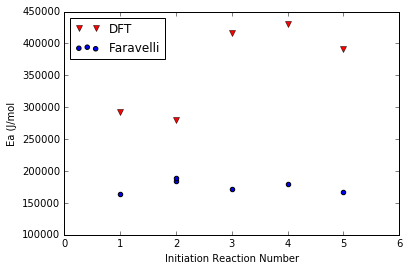

In [23]:
# These are the values of Ea for the corresponding reactions from Faravelli 
# et al.'s kinetic scheme.
# 1 is reaction 4, 2 is reaction 5, 3 is reaction 7,
# 4 is reaction 8, 5 is reaction 9
ea_paper = [[1,163254],[2,184184],[2,188370],[3,171626],[4,179998],[5,167440]]

plt.scatter(*zip(*ea_paper), label='Faravelli')
plt.plot([1, 2, 3, 4, 5], e_a, 'rv', label='DFT')
plt.xlabel('Initiation Reaction Number')
plt.ylabel('Ea (J/mol')
plt.legend(loc=0)

In [25]:
avg_DFT = sum(e_a) / len(e_a)
avg_paper = 173719

# This is the factor that you must divide the DFT-derived
# results by to match the paper.
factor = float(avg_DFT)/avg_paper
print factor

2.08529291557


# Determine the activation energy for the initiation reactions we are adding to the kinetic scheme

In [26]:
logfiles = !ls data/DFT/fission_reactions/*.log

# A dictionary of the enthalpies for each molecule
enthal = {}
for filename in logfiles:
    with open(filename, 'r') as log:
        for line in log:
            if all(word in line for word in ['Sum', 'Enthal']):
                enthal[filename.split('/')[3].split('.')[0]] = (627.5095 * 
                                                        float(line.split()[6]))

# This is the enthalpy in kcal/mol
enthal

{'Benzyl': -145216.34776372448,
 'Mol1': -337737.9742096405,
 'Mol2': -481401.489474703,
 'Mol3': -387034.5946766795,
 'Rad1': -192437.66755734448,
 'Rad2': -336107.98377036804,
 'Rad3': -241737.49961800448}

In [27]:
# Mol1 is PLIGC, Mol2 is PLIGH and PLIGO, benzyl is P* 
# in J/mol
deltaH_PLIGC = int(round(4184 * (enthal['Rad1'] + enthal['Benzyl'] -
                                 enthal['Mol1'])))
deltaH_PLIGH = int(round(4184 * (enthal['Rad2'] + enthal['Benzyl'] -
                                 enthal['Mol2'])))
deltaH_PLIGO = deltaH_PLIGH

print deltaH_PLIGC, '\n', deltaH_PLIGH

351284 
322829


In [28]:
### estimating Ea from deltaH using Blowers Masel correlation
E0 = 9 * 4184        # J/mol
e_a = []

for deltaH in [deltaH_PLIGC, deltaH_PLIGH]:
    try:
        if deltaH < -4 * E0:
            e_a.append(0)
        elif deltaH > 4 * E0:
            e_a.append(int(round(deltaH)))
        else:
            e_a.append(int(round(E0 * ((1 + (deltaH / (4 * E0)))**2))))
    except ValueError: print 'There was an error'
    
print [round(x / factor) for x in e_a]    # This prints Ea_PLIGC, Ea_PLIGH

[168458.0, 154812.0]
